# Proyecto Showz

##  Acceda los datos y prepáralos para el análisis

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Leemos los conjuntos de datos en varios DataFrames
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

### DataFrame "Visits"

**Estadística Descriptiva**

In [3]:
# Imprimimos la estadística descriptiva del df "VISITS"
print("DATAFRAME VISITS")
print(visits.head())
print("----------------------------------------------------------------")
print(visits.info())
print("----------------------------------------------------------------")
print(visits.describe())

DATAFRAME VISITS
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid 

**Tipos de datos**

In [4]:
# Convierte los datos en los tipos necesarios
# Primero inspeccionamos los tipos actuales
print(visits.dtypes)

Device       object
End Ts       object
Source Id     int64
Start Ts     object
Uid          uint64
dtype: object


In [5]:
# Convertimos las columnas a sus tipos de datos correspondientes
visits['Device'] = visits['Device'].astype('string')
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Uid'] = visits['Uid'].astype('string')

In [6]:
# Revisamos que los tipos de datos se hayan cambiado correctamente
print(visits.dtypes)

Device               string
End Ts       datetime64[ns]
Source Id             int64
Start Ts     datetime64[ns]
Uid                  string
dtype: object


**Datos Ausentes**

In [7]:
# Revisamos y eliminamos duplicados
print(visits.isnull().sum())

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64


No hay duplicados por lo que podemos comenzar con el análisis

### DataFrame "Orders"

**Estadística Descriptiva**

In [8]:
# Imprimimos la estadística descriptiva del df "ORDERS"
print("DATAFRAME ORDERS")
print(orders.head())
print("----------------------------------------------------------------")
print(orders.info())
print("----------------------------------------------------------------")
print(orders.describe())
print("----------------------------------------------------------------")

DATAFRAME ORDERS
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
----------------------------------------------------------------
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.1357

**Tipos de datos**

In [9]:
# Convierte los datos en los tipos necesarios
# Primero inspeccionamos los tipos actuales
print(orders.dtypes)

Buy Ts      object
Revenue    float64
Uid         uint64
dtype: object


In [10]:
# Convertimos las columnas a sus tipos de datos correspondientes
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders['Revenue'] = orders['Revenue'].astype('float')
orders['Uid'] = orders['Uid'].astype('string')

In [11]:
# Revisamos que los tipos de datos se hayan cambiado correctamente
print(orders.dtypes)

Buy Ts     datetime64[ns]
Revenue           float64
Uid                string
dtype: object


**Duplicados**

In [12]:
# Revisamos y eliminamos duplicados
print(orders.isnull().sum())

Buy Ts     0
Revenue    0
Uid        0
dtype: int64


No hay duplicados por lo que podemos comenzar con el análisis

### DataFrame "Costs"

**Estadística Descriptiva**

In [13]:
# Imprimimos la estadística descriptiva del df "COSTS"
print("DATAFRAME COSTS")
print(costs.head())
print("----------------------------------------------------------------")
print(costs.info())
print("----------------------------------------------------------------")
print(costs.describe())

DATAFRAME COSTS
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
----------------------------------------------------------------
         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000


**Tipos de datos**

In [14]:
# Convierte los datos en los tipos necesarios
# Primero inspeccionamos los tipos actuales
print(costs.dtypes)

source_id      int64
dt            object
costs        float64
dtype: object


In [15]:
# Convertimos las columnas a sus tipos de datos correspondientes
costs['dt'] = pd.to_datetime(costs['dt'])
costs['costs'] = costs['costs'].astype('float')

In [16]:
# Revisamos que los tipos de datos se hayan cambiado correctamente
print(costs.dtypes)

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


**Duplicados**

In [17]:
# Revisamos y eliminamos duplicados
print(costs.isnull().sum())

source_id    0
dt           0
costs        0
dtype: int64


No hay duplicados por lo que podemos comenzar con el análisis

## Haz informes y calcula métricas 

**¿Cuántas personas lo usan cada día, semana y mes?**

In [18]:
# 1. Personas que lo usan cada día, semana y mes
# Usuarios únicos por día
users_per_day = visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique()
# Usuarios únicos por semana
users_per_week = visits.groupby(visits['Start Ts'].dt.to_period('W'))['Uid'].nunique()
# Usuarios únicos por mes
users_per_month = visits.groupby(visits['Start Ts'].dt.to_period('M'))['Uid'].nunique()

In [19]:
# Resultados
print("Usuarios únicos por día:")
print(users_per_day.head())
print("\nUsuarios únicos por semana:")
print(users_per_week.head())
print("\nUsuarios únicos por mes:")
print(users_per_month.head())

Usuarios únicos por día:
Start Ts
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64

Usuarios únicos por semana:
Start Ts
2017-05-29/2017-06-04    2021
2017-06-05/2017-06-11    4129
2017-06-12/2017-06-18    2812
2017-06-19/2017-06-25    2878
2017-06-26/2017-07-02    3064
Freq: W-SUN, Name: Uid, dtype: int64

Usuarios únicos por mes:
Start Ts
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: Uid, dtype: int64


Promedio diario de usuarios: 907.99
Promedio semanal de usuarios: 5716.25
Promedio mensual de usuarios: 23228.42


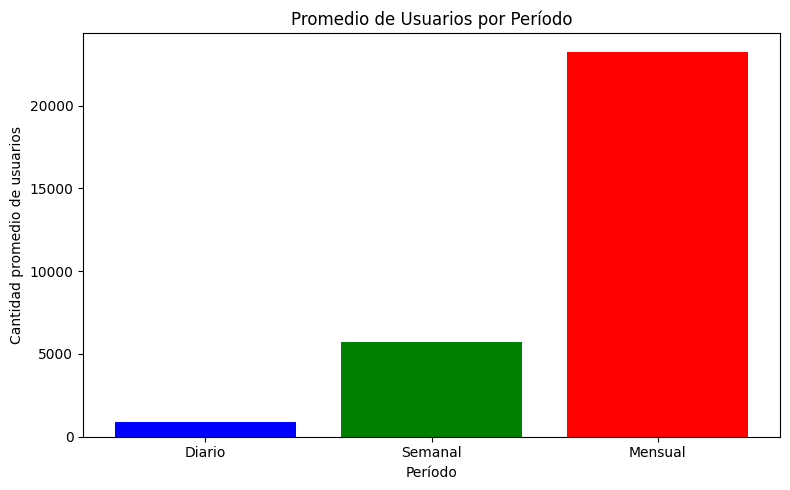

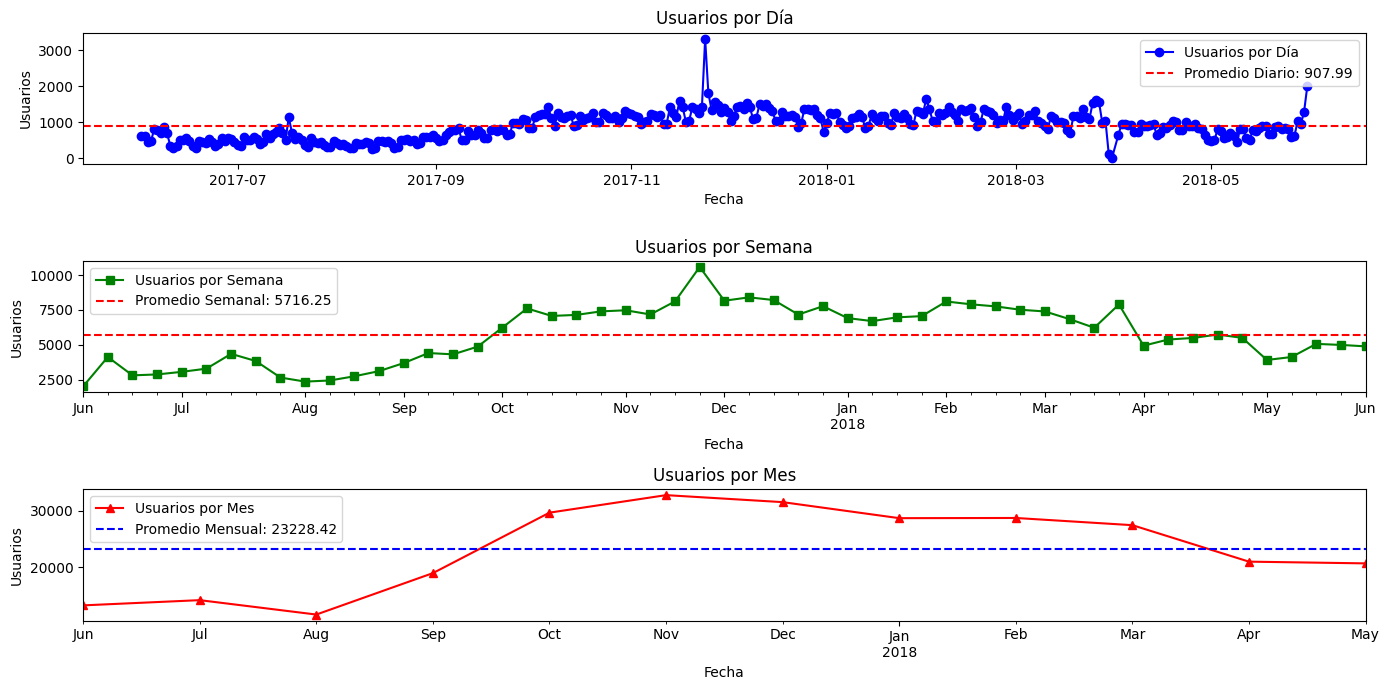

In [21]:
# Gráficos

# Calcular promedios
daily_avg_users = users_per_day.mean()
weekly_avg_users = users_per_week.mean()
monthly_avg_users = users_per_month.mean()

# Mostrar los promedios calculados
print(f"Promedio diario de usuarios: {daily_avg_users:.2f}")
print(f"Promedio semanal de usuarios: {weekly_avg_users:.2f}")
print(f"Promedio mensual de usuarios: {monthly_avg_users:.2f}")

# Crear un gráfico de barras para los promedios
labels = ['Diario', 'Semanal', 'Mensual']
averages = [daily_avg_users, weekly_avg_users, monthly_avg_users]

plt.figure(figsize=(8, 5))
plt.bar(labels, averages, color=['b', 'g', 'r'])
plt.xlabel("Período")
plt.ylabel("Cantidad promedio de usuarios")
plt.title("Promedio de Usuarios por Período")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Graficar los datos originales por día, semana y mes para una comparación visual
plt.figure(figsize=(14, 7))

# Gráfico por día
plt.subplot(3, 1, 1)
users_per_day.plot(marker='o', color='b', label="Usuarios por Día")
plt.axhline(daily_avg_users, color='r', linestyle='--', label=f"Promedio Diario: {daily_avg_users:.2f}")
plt.title("Usuarios por Día")
plt.xlabel("Fecha")
plt.ylabel("Usuarios")
plt.legend()

# Gráfico por semana
plt.subplot(3, 1, 2)
users_per_week.plot(marker='s', color='g', label="Usuarios por Semana")
plt.axhline(weekly_avg_users, color='r', linestyle='--', label=f"Promedio Semanal: {weekly_avg_users:.2f}")
plt.title("Usuarios por Semana")
plt.xlabel("Fecha")
plt.ylabel("Usuarios")
plt.legend()

# Gráfico por mes
plt.subplot(3, 1, 3)
users_per_month.plot(marker='^', color='r', label="Usuarios por Mes")
plt.axhline(monthly_avg_users, color='b', linestyle='--', label=f"Promedio Mensual: {monthly_avg_users:.2f}")
plt.title("Usuarios por Mes")
plt.xlabel("Fecha")
plt.ylabel("Usuarios")
plt.legend()

plt.tight_layout()

# Mostrar los gráficos comparativos
plt.show()

**Comentarios**

De las gráficas podemos ver que a medida que los datos se agregan a periodos más largos (semanal y mensual), la cantidad promedio de usuarios aumenta considerablemente.
Además, existe una tendencia de crecimiento general, con picos notables en diciembre de 2017 (diario y semanal) y noviembre de 2017 (mensual).
Sin embargo, después de los picos, hay un declive leve en la actividad, reflejado tanto en los datos semanales como mensuales.

**¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)**

In [22]:
# 2. Número de sesiones por día
sessions_per_day = visits.groupby(visits['Start Ts'].dt.date).size()

In [23]:
# Resultados
print("\nSesiones por día:")
print(sessions_per_day.head())


Sesiones por día:
Start Ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
dtype: int64


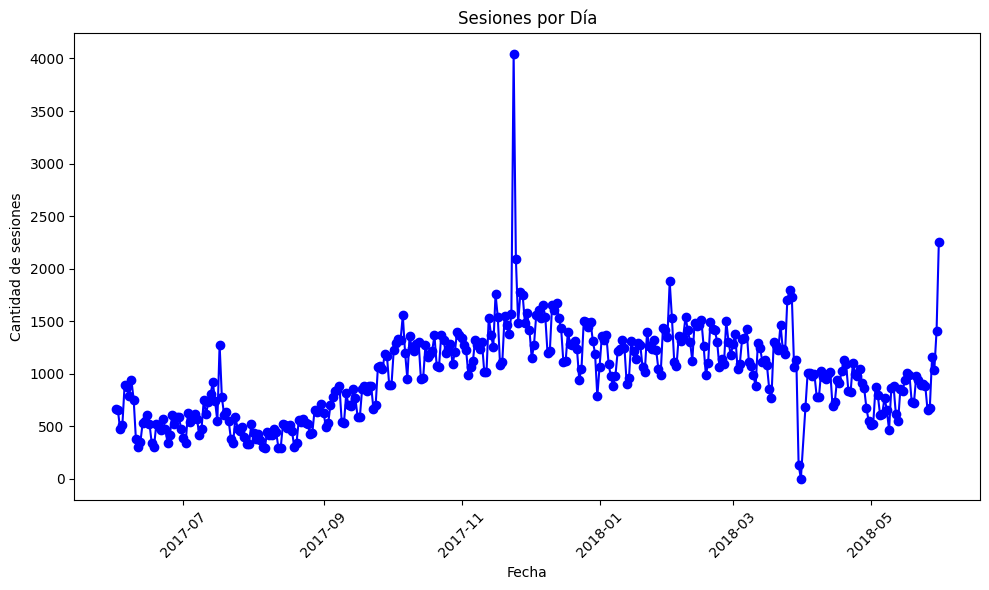

In [24]:
# Gráfico

# Crear el gráfico de sesiones por día
plt.figure(figsize=(10, 6))
plt.plot(sessions_per_day.index, sessions_per_day.values, label="Sesiones por día", marker='o', linestyle='-', color='b')
plt.xlabel("Fecha")
plt.ylabel("Cantidad de sesiones")
plt.title("Sesiones por Día")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Comentarios**

Del gráfico podemos ver que en noviembre de 2017 hubo un pico muy drástico en el número de sesiones por día y en abril de 2018 hubo un gran declive en las sesiones. Se recomendaría indagar el porque de estos picos muy drásticos pero en general podemos observar que en promedio durante estos 2 años hubo unas 1,000 visitas al sitio por día.

**¿Cuál es la duración de cada sesión?**

In [25]:
# 3. Duración de cada sesión
visits['Session Duration (minutes)'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds() / 60

In [26]:
# Resultados
print("\nDuración de cada sesión (minutos):")
print(visits[['Uid', 'Session Duration (minutes)']].head())


Duración de cada sesión (minutos):
                    Uid  Session Duration (minutes)
0  16879256277535980062                        18.0
1    104060357244891740                        28.0
2   7459035603376831527                         0.0
3  16174680259334210214                        24.0
4   9969694820036681168                         0.0


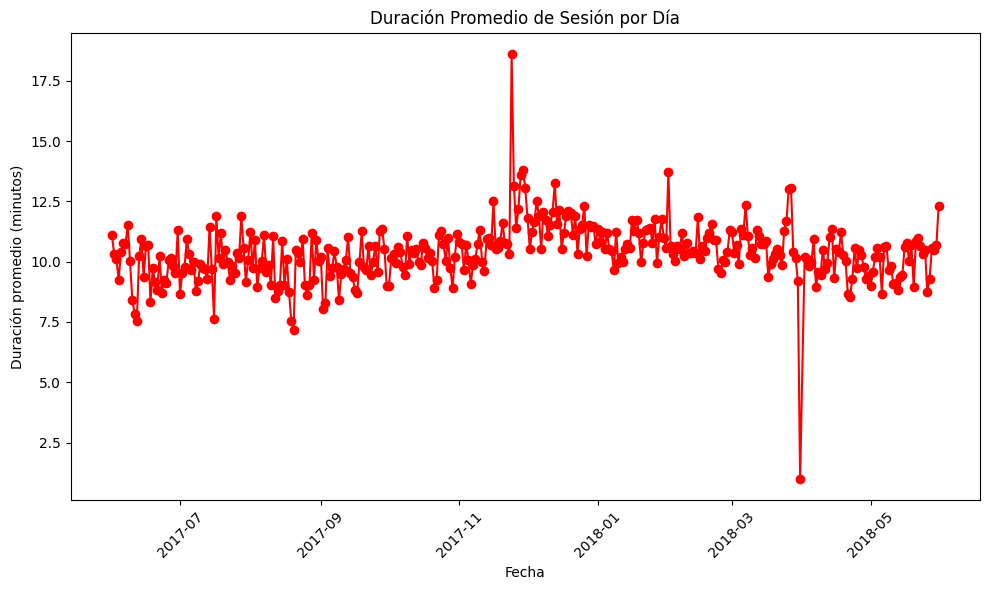

In [27]:
# Gráfico

# Calcular la duración de las sesiones en minutos
visits['Session Duration (minutes)'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds() / 60

# Calcular la duración promedio por día
avg_duration_per_day = visits.groupby(visits['Start Ts'].dt.date)['Session Duration (minutes)'].mean()

# Crear el gráfico de duración promedio de sesión por día
plt.figure(figsize=(10, 6))
plt.plot(avg_duration_per_day.index, avg_duration_per_day.values, label="Duración promedio por día (minutos)", marker='o', linestyle='-', color='r')
plt.xlabel("Fecha")
plt.ylabel("Duración promedio (minutos)")
plt.title("Duración Promedio de Sesión por Día")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Comentarios**

Del gráfico podemos ver que la duración promedio de las visitas ronda entre los 7.5 y 12.5 min. A pesar de esto, los dos picos se siguen mostrando (uno a la alta y otro a la bahaja) del mismo modo que se pudo ver en la gráfica de arriba.

**¿Con qué frecuencia los usuarios regresan?**

In [28]:
# 4. Frecuencia de retorno de usuarios
# Ordenar las visitas por usuario y fecha
visits = visits.sort_values(by=['Uid', 'Start Ts'])
# Calcular la fecha de la próxima visita por usuario
visits['Next Visit'] = visits.groupby('Uid')['Start Ts'].shift(-1)
# Calcular días entre visitas consecutivas
visits['Days Between Visits'] = (visits['Next Visit'] - visits['Start Ts']).dt.days

In [29]:
# Resultados
print("\nDías entre visitas consecutivas:")
print(visits[['Uid', 'Days Between Visits']].dropna().head())



Días entre visitas consecutivas:
                         Uid  Days Between Visits
21480   10000837700716403746                  0.0
172014  10000837700716403746                  0.0
19640   10000837700716403746                 11.0
74851   10000837700716403746                  0.0
214554  10000837700716403746                  1.0


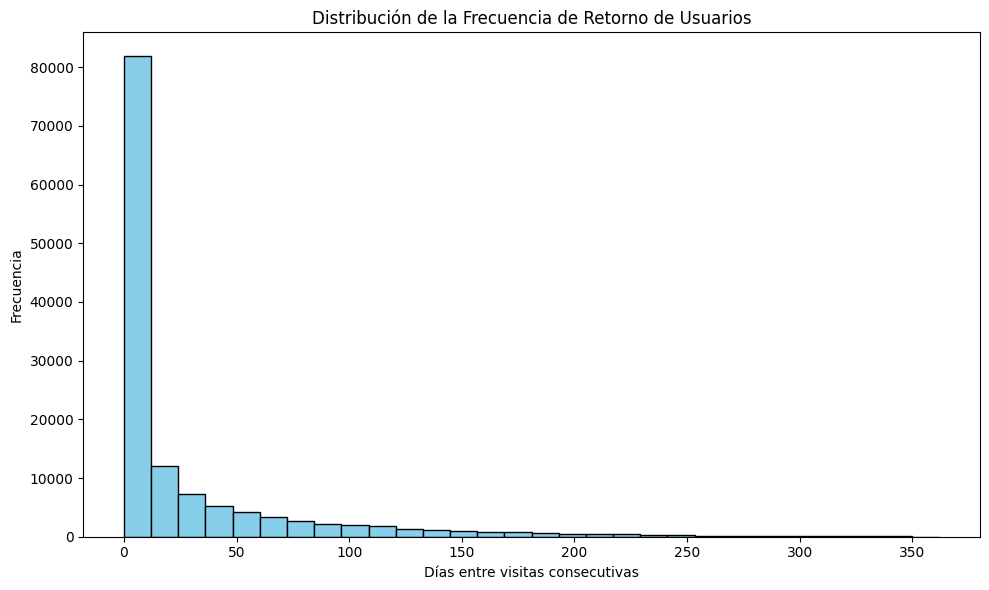

In [30]:
# Gráfico

# Filtrar para eliminar valores NaN (última visita de cada usuario)
visits_cleaned = visits.dropna(subset=['Days Between Visits'])

# Graficar la distribución de los días entre visitas
plt.figure(figsize=(10, 6))
plt.hist(visits_cleaned['Days Between Visits'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Días entre visitas consecutivas")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Frecuencia de Retorno de Usuarios")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Comentarios**

Del gráfico podemos ver que la frecuencia de retornos de los usuarios se agrupa principalmente en los días 0 - 10 consecutivos de visitas; es decir, la gran mayoría de los usuarios no pasan más de 10 días en regresar otra vez al sitio web, lo cual nos dice que los usuarios han salido muy complaicdos con los servicios que se ofrecen por lo que tienden a regresar.

**¿Cuándo empieza la gente a comprar?**

(En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

In [31]:
# 1. Obtener la primera visita de cada usuario (la primera fila para cada Uid)
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visit.columns = ['Uid', 'first_visit_ts']
print(first_visit)

                         Uid      first_visit_ts
0       10000171586432207426 2017-12-01 15:11:00
1       10000344846682484395 2018-02-21 16:01:00
2        1000036778515242839 2017-09-05 20:22:00
3       10000460875579931334 2017-09-13 09:12:00
4       10000558740593440652 2018-01-03 18:39:00
...                      ...                 ...
228164   9999530179466660745 2017-06-14 14:33:00
228165   9999704916412649026 2017-06-29 23:04:00
228166   9999829453910784044 2017-11-09 15:32:00
228167   9999912853550499774 2017-08-18 09:23:00
228168   9999996800317156310 2017-11-24 17:22:00

[228169 rows x 2 columns]


In [32]:
# 2. Obtener la primera compra de cada usuario (la primera fila para cada Uid en Orders)
first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_order.columns = ['Uid', 'first_order_ts']
print(first_order)

                        Uid      first_order_ts
0      10000837700716403746 2017-06-21 16:12:00
1      10000997030965831953 2018-01-19 12:28:00
2      10001199569370567060 2017-11-25 17:29:00
3      10002243978166172255 2017-10-15 17:20:00
4      10003351403065971701 2017-11-20 13:18:00
...                     ...                 ...
36518    999745712858219747 2017-08-08 17:53:00
36519   9997777271989789335 2017-11-17 16:36:00
36520    999906621142257600 2018-01-26 22:16:00
36521   9999334409150825432 2017-12-06 13:28:00
36522   9999407206938542587 2018-02-14 19:50:00

[36523 rows x 2 columns]


In [33]:
# 3. Unir la primera visita con la primera compra
user_data = pd.merge(first_order, first_visit, on='Uid', how='left')
print(user_data)

                        Uid      first_order_ts      first_visit_ts
0      10000837700716403746 2017-06-21 16:12:00 2017-06-08 10:12:00
1      10000997030965831953 2018-01-19 12:28:00 2018-01-19 11:16:00
2      10001199569370567060 2017-11-25 17:29:00 2017-11-25 17:26:00
3      10002243978166172255 2017-10-15 17:20:00 2017-10-15 17:18:00
4      10003351403065971701 2017-11-20 13:18:00 2017-11-20 13:17:00
...                     ...                 ...                 ...
36518    999745712858219747 2017-08-08 17:53:00 2017-08-08 15:12:00
36519   9997777271989789335 2017-11-17 16:36:00 2017-11-17 16:35:00
36520    999906621142257600 2018-01-26 22:16:00 2018-01-26 22:05:00
36521   9999334409150825432 2017-12-06 13:28:00 2017-12-06 13:26:00
36522   9999407206938542587 2018-02-14 19:50:00 2018-02-14 19:47:00

[36523 rows x 3 columns]


In [34]:
# 4. Calcular el tiempo en días entre la primera visita y la primera compra
user_data['days_to_conversion'] = (user_data['first_order_ts'] - user_data['first_visit_ts']).dt.days

print(user_data)


                        Uid      first_order_ts      first_visit_ts  \
0      10000837700716403746 2017-06-21 16:12:00 2017-06-08 10:12:00   
1      10000997030965831953 2018-01-19 12:28:00 2018-01-19 11:16:00   
2      10001199569370567060 2017-11-25 17:29:00 2017-11-25 17:26:00   
3      10002243978166172255 2017-10-15 17:20:00 2017-10-15 17:18:00   
4      10003351403065971701 2017-11-20 13:18:00 2017-11-20 13:17:00   
...                     ...                 ...                 ...   
36518    999745712858219747 2017-08-08 17:53:00 2017-08-08 15:12:00   
36519   9997777271989789335 2017-11-17 16:36:00 2017-11-17 16:35:00   
36520    999906621142257600 2018-01-26 22:16:00 2018-01-26 22:05:00   
36521   9999334409150825432 2017-12-06 13:28:00 2017-12-06 13:26:00   
36522   9999407206938542587 2018-02-14 19:50:00 2018-02-14 19:47:00   

       days_to_conversion  
0                      13  
1                       0  
2                       0  
3                       0  
4      

In [35]:
# 5. Clasificar a los usuarios según el tiempo de conversión
def conversion_category(days):
    if pd.isna(days):
        return 'No Purchase'
    elif days == 0:
        return 'Conversion 0d'
    else:
        return f'Conversion {days}d'

user_data['conversion_category'] = user_data['days_to_conversion'].apply(conversion_category)

# 6. Análisis de cohortes de marketing: unir con el DataFrame Visits para obtener la fuente de los anuncios
visits['Source Id'] = visits['Source Id'].astype(str)  # Asegurar que Source Id sea un string
user_data = pd.merge(user_data, visits[['Uid', 'Source Id']], on='Uid', how='left')

# Mostrar los resultados
print(user_data[['Uid', 'conversion_category', 'Source Id']].drop_duplicates().head(5))

                    Uid conversion_category Source Id
0  10000837700716403746      Conversion 13d         4
1  10000837700716403746      Conversion 13d         1
4  10000837700716403746      Conversion 13d         5
7  10000997030965831953       Conversion 0d         4
8  10001199569370567060       Conversion 0d         4


**¿Cuántos pedidos hacen durante un período de tiempo dado?**

In [36]:
# Agrupamos los pedidos por mes
orders_per_period = orders.groupby(orders['Buy Ts'].dt.to_period('M')).size()

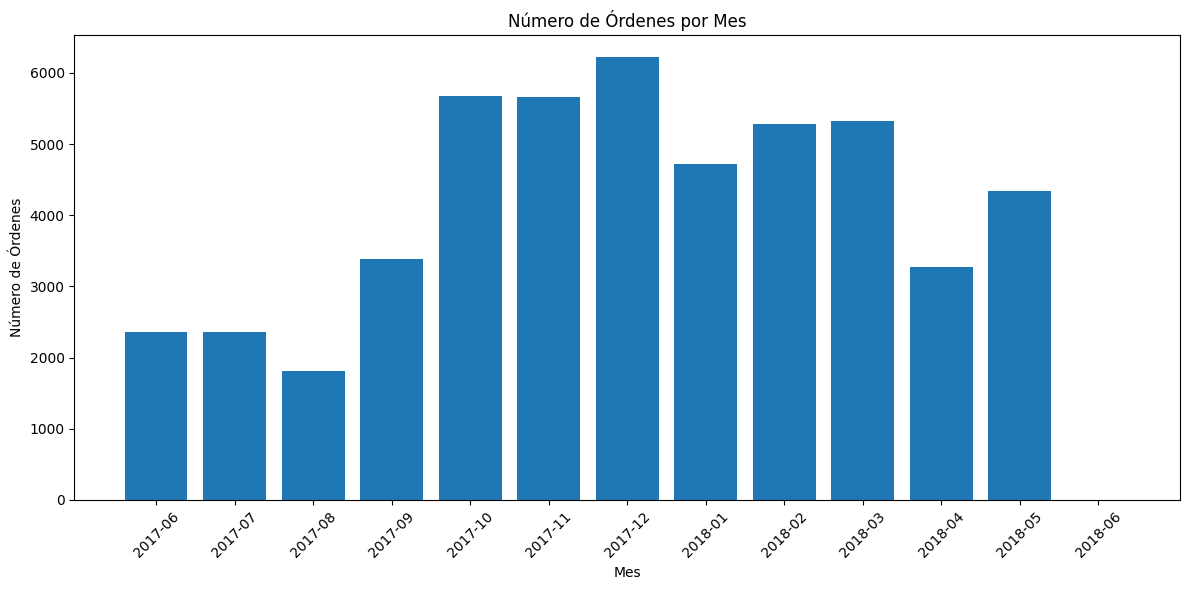

In [37]:
# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(orders_per_period.index.astype(str), orders_per_period.values)

# Mejorar la visualización
plt.xlabel("Mes")
plt.ylabel("Número de Órdenes")
plt.title("Número de Órdenes por Mes")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Comentarios**

Del gráfico podemos ver que el número de las órdenes por mes tiene un crecimiento consirable entre los meses de octubre 2017 y marzo 2018. A lo mejor en esos meses hubo eventos de mayor interés a los usuarios donde se vio reflejado este incremento en el número de órdenes. De la misma forma en los extremos (junio 2017 a septiembre 2017) se ve que la demanda no fue del todo alta con un máximo de 3,500 ordenes al mes, comparados con los casi 6,000 órdenes en los meses altos.

**¿Cuál es el tamaño promedio de compra?**

In [38]:
average_order_value = orders['Revenue'].mean()
print(average_order_value)

4.999646930477041


**¿Cuánto dinero traen? (LTV)**

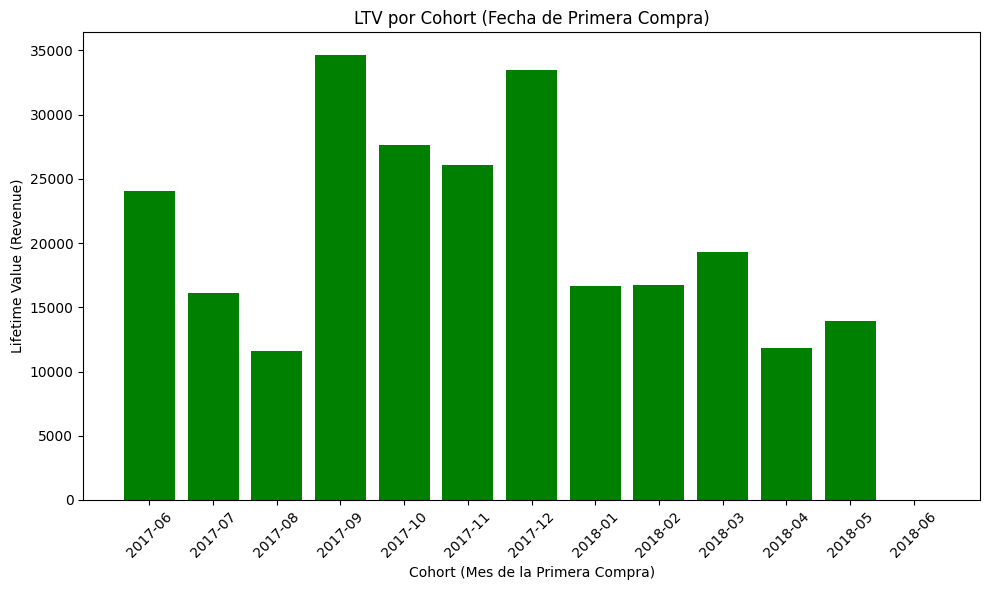

In [53]:
# Asegúrate de que la columna 'Buy Ts' sea de tipo fecha
orders['Date'] = pd.to_datetime(orders['Buy Ts'])

# Crear la columna de cohort (mes de la primera compra por usuario)
orders['Cohort'] = orders.groupby('Uid')['Buy Ts'].transform('min').dt.to_period('M')

# Calcular el LTV por cohort
ltv_cohort = orders.groupby('Cohort')['Revenue'].sum().reset_index()

# Convertir la columna 'Cohort' a string para graficarla
ltv_cohort['Cohort'] = ltv_cohort['Cohort'].astype(str)

# Crear una gráfica de barras para mostrar el LTV por cohort
plt.figure(figsize=(10, 6))
plt.bar(ltv_cohort['Cohort'], ltv_cohort['Revenue'], color='green')
plt.title('LTV por Cohort (Fecha de Primera Compra)')
plt.xlabel('Cohort (Mes de la Primera Compra)')
plt.ylabel('Lifetime Value (Revenue)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comentarios**

Del gráfico podemos ver los meses de septiembre 2017 a diciembre 2017 fueron los meses con mas ingresos por cohort generados por la empresa. Además se puede ver que en 2018, la empresa no tuvo un gran comienzo de año debido a que sus ingresos estuvieron por debajo de lo esperado, promediando $15,000, comparados con los más de $25,000 de los meses top en 2017.

**¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)**

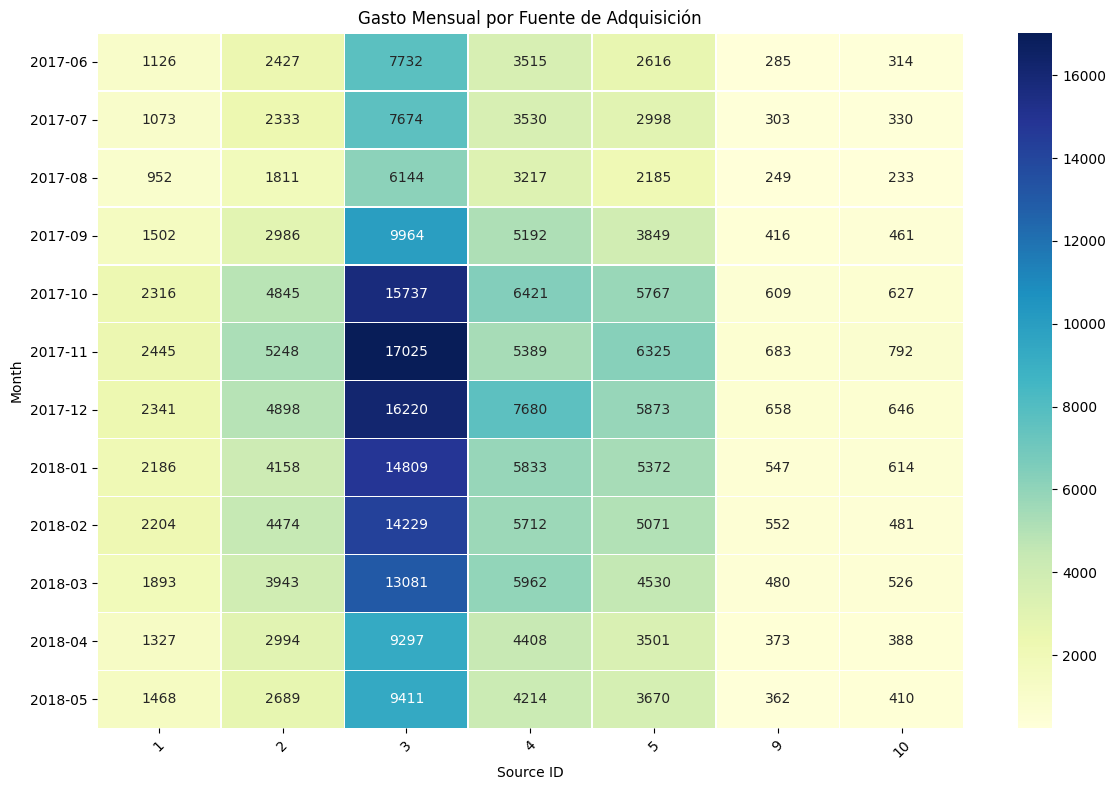

In [54]:
# Asegúrate de que 'dt' sea de tipo fecha
costs['dt'] = pd.to_datetime(costs['dt'])

# Crear una columna con el mes correspondiente
costs['Month'] = costs['dt'].dt.to_period('M')

# Calcular el gasto total por fuente y por mes usando pivot_table
costs_pivot = costs.pivot_table(values='costs', 
                                index='Month', 
                                columns='source_id', 
                                aggfunc='sum', 
                                fill_value=0)

# Convertir el índice 'Month' a string para mejorar la gráfica
costs_pivot.index = costs_pivot.index.astype(str)

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(costs_pivot, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Gasto Mensual por Fuente de Adquisición")
plt.xlabel("Source ID")
plt.ylabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Comentarios**

Del mapa de calor podemos ver que el Source ID con mayor gasto fue el 3, con picos al cierre del 2017. Sorprendentemente, ningpun otros Source ID estuve cerca de los gastos que tuve este Source a lo largo de los años. Además, podemos observar que los Sources 1, 9 y 10 tuvieron los menores gastos mensuales, lo que nos dice o que no son tan vistos o no generan tantas visitas. Todo esto lo debería tomar en cuenta la empresa para maximizar sus ganancias.

**¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**

In [41]:
# Unir la información de los usuarios que compraron con la fuente de adquisición
first_order['first_order_ts'] = pd.to_datetime(first_order['first_order_ts'])
user_data = pd.merge(first_order, visits[['Uid', 'Source Id']], on='Uid', how='left')

# Calcular el número de clientes por fuente de adquisición
clients_by_source = user_data.groupby('Source Id')['Uid'].nunique().reset_index()
clients_by_source.columns = ['Source Id', 'Num Clients']

# Convertir 'Source Id' en ambos DataFrames a tipo string para evitar conflictos de tipo
total_cost_by_source['Source Id'] = total_cost_by_source['Source Id'].astype(str)
clients_by_source['Source Id'] = clients_by_source['Source Id'].astype(str)

# Unir los datos de clientes con los costos por fuente
cac_by_source = pd.merge(total_cost_by_source, clients_by_source, on='Source Id')

# Calcular el costo de adquisición por cliente
cac_by_source['CAC'] = cac_by_source['Total Costs'] / cac_by_source['Num Clients']

# Mostrar el costo de adquisición por fuente
print("Costo de adquisición de clientes por fuente:")
print(cac_by_source[['Source Id', 'CAC']])


Costo de adquisición de clientes por fuente:
  Source Id        CAC
0         1   2.918642
1         2   5.859828
2         3  10.206676
3         4   4.284965
4         5   5.096209
5         9   1.975471
6        10   3.283976


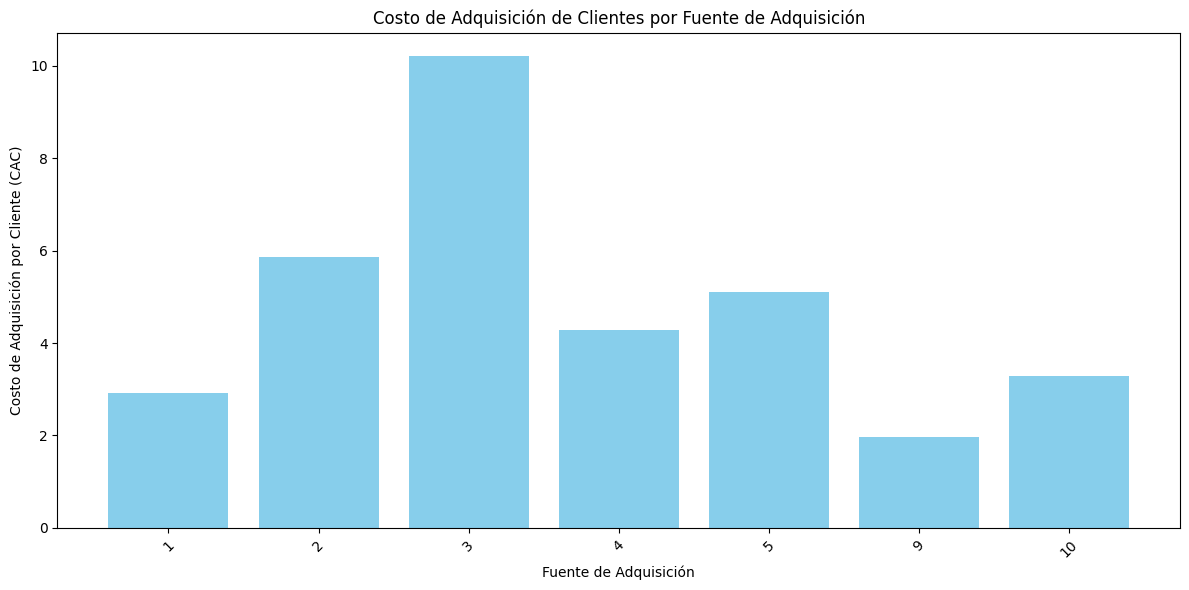

In [42]:
# Gráfico

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(cac_by_source['Source Id'], cac_by_source['CAC'], color='skyblue')

# Mejorar la visualización
plt.xlabel("Fuente de Adquisición")
plt.ylabel("Costo de Adquisición por Cliente (CAC)")
plt.title("Costo de Adquisición de Clientes por Fuente de Adquisición")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Comentarios**

Siguiendo el análisis del mapa de calor, podemos rectificar lo comentado allá, donde la fuente 3 fue la de mayor gasto, mientras que la 1, 9 y 10 tuvieron el menor gasto. Aquí ya se muestra un poco más resumido y sin tanto color.

**¿Cuán rentables eran las inversiones? (ROMI)**

In [43]:
# Calcular los ingresos generados por cada fuente
orders_by_source = pd.merge(orders, visits[['Uid', 'Source Id']], on='Uid', how='left')
revenue_by_source = orders_by_source.groupby('Source Id')['Revenue'].sum().reset_index()
revenue_by_source.columns = ['Source Id', 'Total Revenue']

# Unir los ingresos con los costos por fuente
romi_by_source = pd.merge(cac_by_source, revenue_by_source, on='Source Id')

# Calcular el ROMI
romi_by_source['ROMI'] = romi_by_source['Total Revenue'] / romi_by_source['Total Costs']

# Mostrar los resultados
print("Rentabilidad de las inversiones (ROMI) por fuente:")
print(romi_by_source[['Source Id', 'ROMI']])

Rentabilidad de las inversiones (ROMI) por fuente:
  Source Id        ROMI
0         1  110.313944
1         2   61.631237
2         3    2.099381
3         4    8.132649
4         5   22.827344
5         9    6.586736
6        10    2.510821


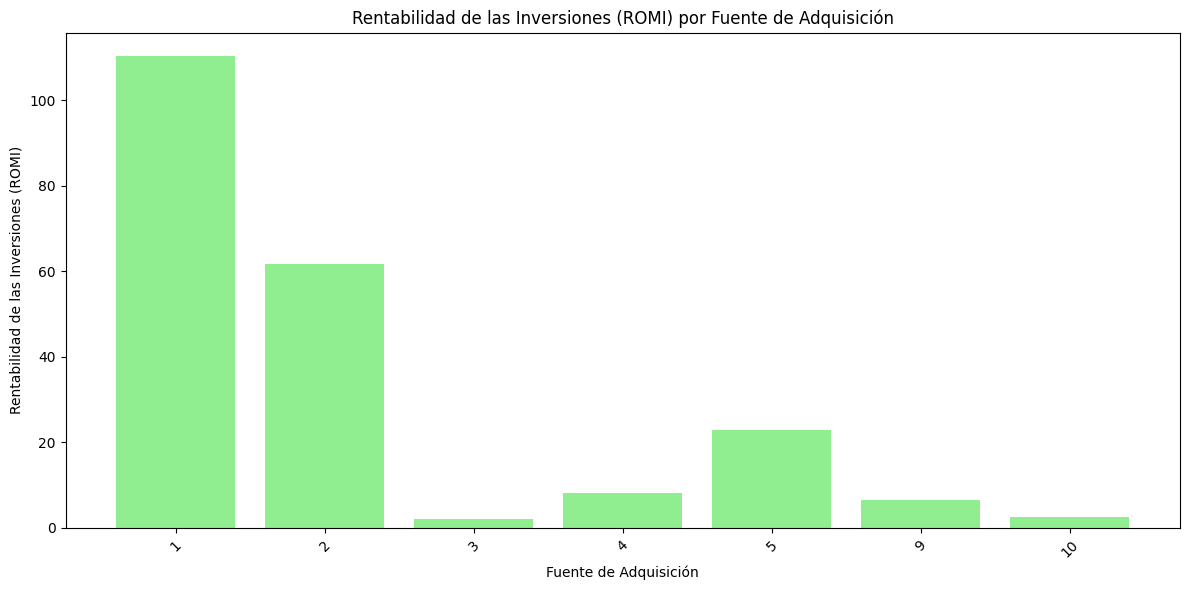

In [44]:
# Gráfico

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(romi_by_source['Source Id'], romi_by_source['ROMI'], color='lightgreen')

# Mejorar la visualización
plt.xlabel("Fuente de Adquisición")
plt.ylabel("Rentabilidad de las Inversiones (ROMI)")
plt.title("Rentabilidad de las Inversiones (ROMI) por Fuente de Adquisición")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

De esta gráfica puedo ver que la fuente con mayor ROMI es la 1 seguida de la 2. Si nos vamos al análisis de la gráfica pasada, podemos ver que el COC de la fuente 1 es de los más bajos, por lo que esta fuente es la más rentable debido a que tiene un menor COC y la mayor rentabilidad de las fuentes. La fuente 2 a pesar de ser la segunda fuente con mayor COC es la segunda fuente con mayor ROMI por lo que también es una fuente prometedora para la empresa.

## Gráficas

In [45]:
# Unir la información de costos y clientes con la fuente de adquisición y los dispositivos
device_info = visits[['Uid', 'Device', 'Source Id', 'Start Ts']].drop_duplicates()

# Asegúrate de que la fecha esté en formato datetime
device_info['Start Ts'] = pd.to_datetime(device_info['Start Ts'])

# Unir los datos con el DataFrame 'cac_by_source'
cac_by_device_source = pd.merge(cac_by_source, device_info, on='Source Id', how='left')

# Verificar el DataFrame resultante
print(cac_by_device_source.head())

  Source Id  Total Costs  Num Clients       CAC                   Uid  \
0         1     20833.27         7138  2.918642  10000837700716403746   
1         1     20833.27         7138  2.918642  10000837700716403746   
2         1     20833.27         7138  2.918642  10000837700716403746   
3         1     20833.27         7138  2.918642  10000962813665337931   
4         1     20833.27         7138  2.918642  10001091218281033249   

    Device            Start Ts  
0  desktop 2017-06-08 13:33:00  
1  desktop 2017-06-08 17:39:00  
2  desktop 2017-06-20 10:42:00  
3    touch 2018-01-29 22:01:00  
4  desktop 2017-10-15 16:19:00  


In [46]:
# Extraer solo la fecha sin la hora
cac_by_device_source['Date'] = cac_by_device_source['Start Ts'].dt.date

# Agrupar por dispositivo, fuente y fecha
cac_by_device_source_grouped = cac_by_device_source.groupby(['Date', 'Device', 'Source Id']).agg(
    Total_Costs=('Total Costs', 'sum'),
    Num_Clients=('Num Clients', 'sum'),
    CAC=('CAC', 'mean')
).reset_index()

# Verificar los primeros resultados
print(cac_by_device_source_grouped.head())

         Date   Device Source Id  Total_Costs  Num_Clients        CAC
0  2017-06-01  desktop         1   1249996.20       428280   2.918642
1  2017-06-01  desktop        10     40757.43        12411   3.283976
2  2017-06-01  desktop         2   2825198.64       482130   5.859828
3  2017-06-01  desktop         3  21763531.02      2132284  10.206676
4  2017-06-01  desktop         4   5740918.40      1339782   4.284965


In [ ]:
# Graficar 'Total Costs' por dispositivo y tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=cac_by_device_source_grouped, x='Date', y='Total_Costs', hue='Device', markers=True)
plt.title('Gastos Totales por Dispositivo a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Gastos Totales')
plt.xticks(rotation=45)
plt.legend(title='Dispositivos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Graficar 'Total Costs' por dispositivo y fuente 
plt.figure(figsize=(12, 8))
sns.lineplot(data=cac_by_device_source_grouped, x='Date', y='Total_Costs', hue='Source Id', markers=True)
plt.title('Gastos Totales por Fuente de Anuncios a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Gastos Totales')
plt.xticks(rotation=45)
plt.legend(title='Fuente de Anuncios', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Graficar 'Num Clients' por dispositivo y tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=cac_by_device_source_grouped, x='Date', y='Num_Clients', hue='Device', markers=True)
plt.title('Número de Clientes por Dispositivo a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Dispositivos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Graficar 'Num Clients' por fuente y tiempo
plt.figure(figsize=(12, 8))
sns.lineplot(data=cac_by_device_source_grouped, x='Date', y='Num_Clients', hue='Source Id', markers=True)
plt.title('Número de Clientes por Fuente de Anuncios a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Fuente de Anuncios', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Conclusiones

**ROMI**: Sabemos que un ROMI alto es mayor a 1, por lo tanto, y viendo la gráfica, podemos concluir que la Fuente de Adquisición 1, 2 y 5 son las más rentables, por lo que estas fuentes deben ser una prioridad para aumentar el presupuesto de marketing o continuar la inversión.

**PLATAFORMAS**: A pesar que la mayor cantidad de clientes está en la plataforma "Desktop" y debido a que es la que más costo les genera, la empresa también deberá implementar estrategias de Marekting para que impulsen la plataforma "Touch", que es de bajo costo, para que así la empresa tenga más clientes por menos costo total de operación.


**FUENTE DE ADQUISICIÓN**: Por las gráficas, sabemos que hay una mayor parte de clientes en las fuentes 3, 4 y 5, pero también sabemos que estas fuentes son las que más Costo por Adquisición por Cliente tienen y también son las que menos ROMI generan. Es por esto que yo sugeriría a la empresa potenciar las fuentes 1 y 2 que son las que más ROMI tienen y tienen un Costo de Aquisición por Cliente menor a lo antes visto. Así la empresa podrá retener a sus clientes y gastar menos; es decir, van a hacer más con menos.

**CANTIDAD DE USUARIOS POR MES**: Derivado del análisis, podemos ver que entre los meses de agosto 2017 y enero 2018 se tuvo una mayor cantidad de usuarios. A pesar de seguir una tendencia a la alza, no podemos concluir que este patrón se seguirá año con año, se deberá analizar los demás años anteriores o posteriores para poder concluir con certeza si existen meses con mayor tendencia o no. Si fuera el caso, ahí hay un área de oportundiad en cuanto a costos y marketing para atraer y retener a sus clientes.

**NÚMERO DE ORDENES**: La cantidad de órdenes hechas es directamente proporcional a la canitdad de usuarios al mes; es decir, mientras más usuarios se tengan en el mes, más órdenes se tendrán. Esto refuerza la idea de que en los meses con picos se tenga una estrategia diferente para poder acaparar todas las órdenes y mantener felices a los clientes.

**DÍAS ENTRE VISITAS CONSECUTIVAS**: Por último, gracias a las gráficas pude notar que la mayor cantidad de clientes tardan menos de 10 días en volver a entrar a la página web, lo que quiere decir que hay una satisfacción del cliente muy buena por parte de la empresa. Esto es bueno ya que aydua a que los clientes se mantengan y posiblemente recomienden sus servicios a familiares o amigos.